<a href="https://colab.research.google.com/github/vengie/neuralnet_deeplearning/blob/main/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [7]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()
train_imags,test_images = train_images/255, test_images/255

In [8]:
train_images[1].shape

(32, 32, 3)

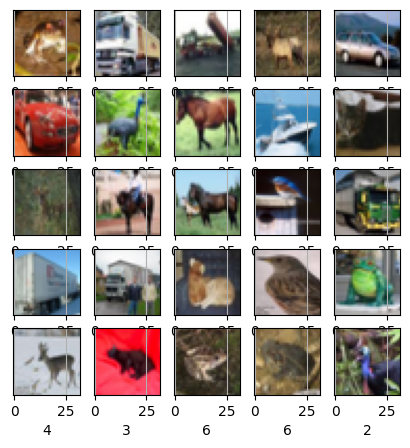

In [19]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.yticks([])
  plt.yticks([])
  plt.grid([False])
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i][0])


In [20]:
model =models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 flatten_1 (Flatten)         (None, 256)              

In [21]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True))

#fit the model to access the historical data
history = model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels))

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 61s 38ms/step - loss: 2.5536 - val_loss: 2.4128
Epoch 2/2
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3729 - val_loss: 2.3463


(0.0, 2.0)

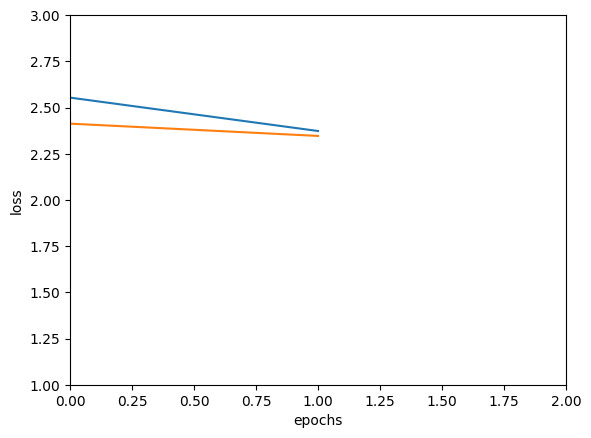

In [22]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim([1,3])
plt.xlim([0,2])


In [25]:
plt.show(train_images[1:2])

ValueError: ignored

In [23]:
model.predict(train_images[1:2])

1/1 [==============================] - 0s 92ms/step


array([[0.665938  , 0.67418736, 0.6694875 , 0.6712454 , 0.67149806,
        0.6717698 , 0.6734237 , 0.66778535, 0.6703842 , 0.66894674,
        0.1301228 , 0.12726487, 0.12897053, 0.13882023, 0.12606712,
        0.13725218]], dtype=float32)